# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [73]:
!pip install citipy

In [74]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [75]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

603

In [76]:
city_name = []
cloudiness = []
country = []
date = []
humidity = []
lat = []
lng = []
max_temp = []
wind_speed = []
index_counter = 0
set_counter = 1

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [77]:

print("Beginning Data Retrieval ")
print("-----------------------------")

base_url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"
query_url = f"{base_url}appid={weather_api_key}&units={units}&q="


# For each city name in cities list, do below things...
for index, city in enumerate(cities, start = 1):
    try:
        response = requests.get(query_url + city).json()
        city_name.append(response["name"])
        cloudiness.append(response["clouds"]["all"])
        country.append(response["sys"]["country"])
        date.append(response["dt"])
        humidity.append(response["main"]["humidity"])
        lat.append(response["coord"]["lat"])
        lng.append(response["coord"]["lon"])
        max_temp.append(response['main']['temp_max'])
        wind_speed.append(response["wind"]["speed"])
        if index_counter > 49:
            index_counter = 0
            set_counter = set_counter + 1
    
        else:
            index_counter = index_counter + 1
            
        print(f"Processing Record {index_counter} of Set {set_counter} : {city}") 
  
    except(KeyError, IndexError):
        print("City not found. Skipping...")

print("-----------------------------")
print("Data Retrieval Complete")
print("-----------------------------")

Beginning Data Retrieval 
-----------------------------
Processing Record 1 of Set 1 : albany
Processing Record 2 of Set 1 : tuktoyaktuk
City not found. Skipping...
Processing Record 3 of Set 1 : beloha
Processing Record 4 of Set 1 : clyde river
City not found. Skipping...
Processing Record 5 of Set 1 : comodoro rivadavia
Processing Record 6 of Set 1 : arman
Processing Record 7 of Set 1 : busselton
Processing Record 8 of Set 1 : kapaa
Processing Record 9 of Set 1 : jamestown
Processing Record 10 of Set 1 : ponta do sol
Processing Record 11 of Set 1 : brusque
Processing Record 12 of Set 1 : homer
Processing Record 13 of Set 1 : hobart
Processing Record 14 of Set 1 : hermanus
Processing Record 15 of Set 1 : maragogi
Processing Record 16 of Set 1 : mataura
Processing Record 17 of Set 1 : pangnirtung
Processing Record 18 of Set 1 : crixas
Processing Record 19 of Set 1 : port said
Processing Record 20 of Set 1 : rikitea
Processing Record 21 of Set 1 : kendari
Processing Record 22 of Set 1 :

Processing Record 33 of Set 4 : yulara
City not found. Skipping...
Processing Record 34 of Set 4 : hofn
Processing Record 35 of Set 4 : vierzon
Processing Record 36 of Set 4 : pop
Processing Record 37 of Set 4 : yar-sale
Processing Record 38 of Set 4 : san jose
Processing Record 39 of Set 4 : innisfail
Processing Record 40 of Set 4 : malakal
Processing Record 41 of Set 4 : namibe
Processing Record 42 of Set 4 : winnemucca
City not found. Skipping...
City not found. Skipping...
Processing Record 43 of Set 4 : buala
Processing Record 44 of Set 4 : palomares
Processing Record 45 of Set 4 : torbay
City not found. Skipping...
Processing Record 46 of Set 4 : santa rosa
Processing Record 47 of Set 4 : bilma
Processing Record 48 of Set 4 : zhuhai
Processing Record 49 of Set 4 : huarmey
Processing Record 50 of Set 4 : malumfashi
Processing Record 0 of Set 5 : ahuimanu
Processing Record 1 of Set 5 : ancud
Processing Record 2 of Set 5 : victoria
Processing Record 3 of Set 5 : geraldton
Processing

Processing Record 16 of Set 8 : djougou
Processing Record 17 of Set 8 : bogo
Processing Record 18 of Set 8 : mestia
Processing Record 19 of Set 8 : ejido
City not found. Skipping...
Processing Record 20 of Set 8 : padang
Processing Record 21 of Set 8 : san carlos de bariloche
Processing Record 22 of Set 8 : rorvik
Processing Record 23 of Set 8 : tessalit
Processing Record 24 of Set 8 : guaraniacu
Processing Record 25 of Set 8 : kaitangata
Processing Record 26 of Set 8 : coahuayana
Processing Record 27 of Set 8 : carutapera
Processing Record 28 of Set 8 : dwarka
Processing Record 29 of Set 8 : kongolo
Processing Record 30 of Set 8 : cassia
Processing Record 31 of Set 8 : vaitape
Processing Record 32 of Set 8 : semporna
Processing Record 33 of Set 8 : kaoma
Processing Record 34 of Set 8 : caravelas
Processing Record 35 of Set 8 : dekalb
Processing Record 36 of Set 8 : tinyahuarco
Processing Record 37 of Set 8 : muswellbrook
Processing Record 38 of Set 8 : mehran
Processing Record 39 of S

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [78]:
weather_df = pd.DataFrame({ 
                "City" : city_name,
                "Cloudiness" : cloudiness,
                "Country" : country,
                "Date" : date,
                "Humidity" : humidity,
                "Lat" : lat,
                "Lng" : lng,
                "Max Temp" : max_temp,
                "Wind Speed" : wind_speed
})

In [79]:
weather_df.count()

City          553
Cloudiness    553
Country       553
Date          553
Humidity      553
Lat           553
Lng           553
Max Temp      553
Wind Speed    553
dtype: int64

In [80]:
weather_df.to_csv("../output_data/cities_csv")

In [81]:
weather_df

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Albany,90,US,1627862191,92,42.6001,-73.9662,66.74,2.42
1,Tuktoyaktuk,90,CA,1627862292,88,69.4541,-133.0374,60.80,11.50
2,Beloha,0,MG,1627862292,61,-25.1667,45.0500,64.06,7.54
3,Clyde River,40,CA,1627862293,87,70.4692,-68.5914,43.03,19.57
4,Comodoro Rivadavia,0,AR,1627862258,22,-45.8667,-67.5000,62.46,12.66
...,...,...,...,...,...,...,...,...,...
548,Yangambi,100,CD,1627862534,82,0.8102,24.4336,73.11,2.37
549,Sawtell,75,AU,1627862534,68,-30.3833,153.1000,66.18,13.80
550,Balikpapan,82,ID,1627862527,90,-1.2675,116.8289,76.71,6.49
551,Polson,28,US,1627862534,82,47.6936,-114.1632,95.14,19.91


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

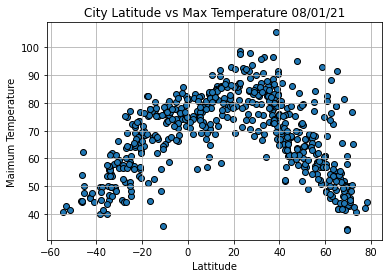

In [97]:
plt.scatter(weather_df["Lat"], weather_df["Max Temp"], edgecolors = "black")
plt.xlabel("Lattitude")
plt.ylabel("Maimum Temperature")
plt.title("City Latitude vs Max Temperature 08/01/21")
plt.grid()

## Latitude vs. Humidity Plot

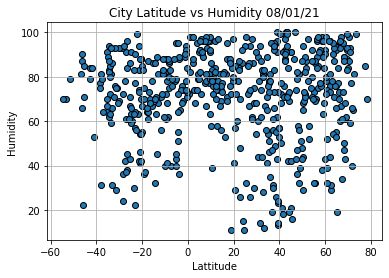

In [98]:
plt.scatter(weather_df["Lat"], weather_df["Humidity"], edgecolors = "black")
plt.xlabel("Lattitude")
plt.ylabel("Humidity")
plt.title("City Latitude vs Humidity 08/01/21")
plt.grid()
plt.show()

## Latitude vs. Cloudiness Plot

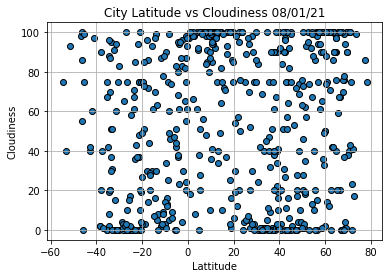

In [99]:
plt.scatter(weather_df["Lat"], weather_df["Cloudiness"], edgecolors = "black")
plt.xlabel("Lattitude")
plt.ylabel("Cloudiness")
plt.title("City Latitude vs Cloudiness 08/01/21")
plt.grid()
plt.show()

## Latitude vs. Wind Speed Plot

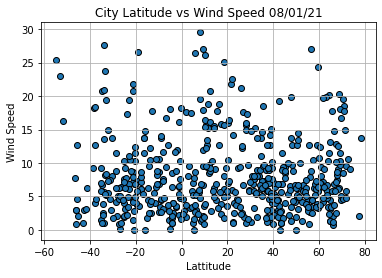

In [100]:
plt.scatter(weather_df["Lat"], weather_df["Wind Speed"], edgecolors = "black")
plt.xlabel("Lattitude")
plt.ylabel("Wind Speed")
plt.title("City Latitude vs Wind Speed 08/01/21")
plt.grid()
plt.show()

## Linear Regression

In [14]:
# OPTIONAL: Create a function to create Linear Regression plots

In [15]:
# Create Northern and Southern Hemisphere DataFrames

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

In [87]:
northern_hemisphere = weather_df.loc[weather_df["Lat"]>0]
southern_hemisphere= weather_df.loc[weather_df["Lat"]<0]

In [88]:
from scipy import stats

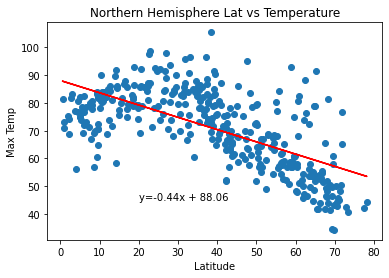

In [89]:
plt.scatter(northern_hemisphere["Lat"], northern_hemisphere["Max Temp"])
x_axis = northern_hemisphere["Lat"]
y_axis = northern_hemisphere["Max Temp"]
plt.xlabel("Latitude")
plt.ylabel("Max Temp")
plt.title("Northern Hemisphere Lat vs Temperature")
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_axis,y_axis)
regress_value = x_axis * slope + intercept
plt.plot(x_axis, regress_value,"r-")
line_eq = f"y={round(slope,2)}x + {round(intercept,2)}"
plt.annotate(line_eq, (20,45))
plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

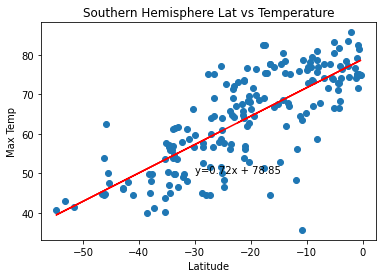

In [90]:
plt.scatter(southern_hemisphere["Lat"], southern_hemisphere["Max Temp"])
x_axis = southern_hemisphere["Lat"]
y_axis = southern_hemisphere["Max Temp"]
plt.xlabel("Latitude")
plt.ylabel("Max Temp")
plt.title("Southern Hemisphere Lat vs Temperature")
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_axis,y_axis)
regress_value = x_axis * slope + intercept
plt.plot(x_axis, regress_value,"r-")
line_eq = f"y={round(slope,2)}x + {round(intercept,2)}"
plt.annotate(line_eq, (-30,50))
plt.show()

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

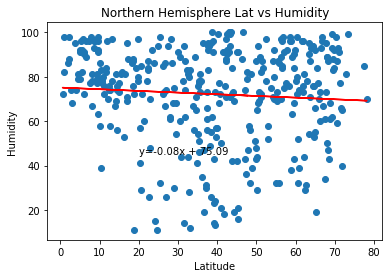

In [91]:
plt.scatter(northern_hemisphere["Lat"], northern_hemisphere["Humidity"])
x_axis = northern_hemisphere["Lat"]
y_axis = northern_hemisphere["Humidity"]
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.title("Northern Hemisphere Lat vs Humidity")
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_axis,y_axis)
regress_value = x_axis * slope + intercept
plt.plot(x_axis, regress_value,"r-")
line_eq = f"y={round(slope,2)}x + {round(intercept,2)}"
plt.annotate(line_eq, (20,45))
plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

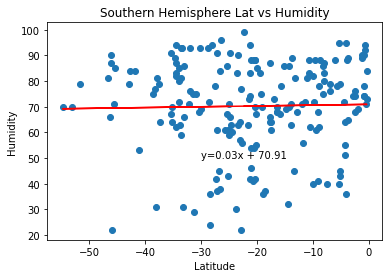

In [92]:
plt.scatter(southern_hemisphere["Lat"], southern_hemisphere["Humidity"])
x_axis = southern_hemisphere["Lat"]
y_axis = southern_hemisphere["Humidity"]
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.title("Southern Hemisphere Lat vs Humidity")
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_axis,y_axis)
regress_value = x_axis * slope + intercept
plt.plot(x_axis, regress_value,"r-")
line_eq = f"y={round(slope,2)}x + {round(intercept,2)}"
plt.annotate(line_eq, (-30,50))
plt.show()

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

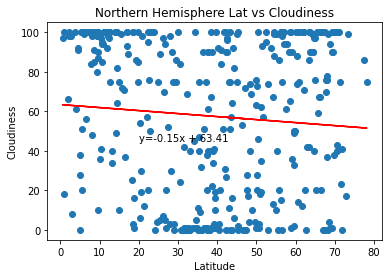

In [93]:
plt.scatter(northern_hemisphere["Lat"], northern_hemisphere["Cloudiness"])
x_axis = northern_hemisphere["Lat"]
y_axis = northern_hemisphere["Cloudiness"]
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.title("Northern Hemisphere Lat vs Cloudiness")
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_axis,y_axis)
regress_value = x_axis * slope + intercept
plt.plot(x_axis, regress_value,"r-")
line_eq = f"y={round(slope,2)}x + {round(intercept,2)}"
plt.annotate(line_eq, (20,45))
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

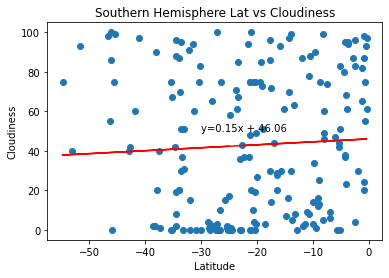

In [94]:
plt.scatter(southern_hemisphere["Lat"], southern_hemisphere["Cloudiness"])
x_axis = southern_hemisphere["Lat"]
y_axis = southern_hemisphere["Cloudiness"]
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.title("Southern Hemisphere Lat vs Cloudiness")
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_axis,y_axis)
regress_value = x_axis * slope + intercept
plt.plot(x_axis, regress_value,"r-")
line_eq = f"y={round(slope,2)}x + {round(intercept,2)}"
plt.annotate(line_eq, (-30,50))
plt.show()

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

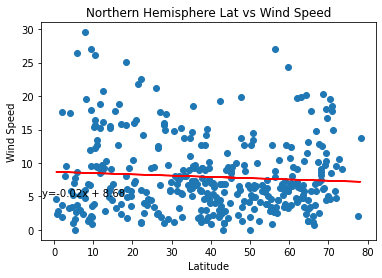

In [95]:
plt.scatter(northern_hemisphere["Lat"], northern_hemisphere["Wind Speed"])
x_axis = northern_hemisphere["Lat"]
y_axis = northern_hemisphere["Wind Speed"]
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.title("Northern Hemisphere Lat vs Wind Speed")
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_axis,y_axis)
regress_value = x_axis * slope + intercept
plt.plot(x_axis, regress_value,"r-")
line_eq = f"y={round(slope,2)}x + {round(intercept,2)}"
plt.annotate(line_eq, (-3,5))
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

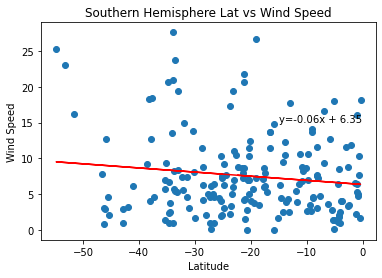

In [96]:
plt.scatter(southern_hemisphere["Lat"], southern_hemisphere["Wind Speed"])
x_axis = southern_hemisphere["Lat"]
y_axis = southern_hemisphere["Wind Speed"]
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.title("Southern Hemisphere Lat vs Wind Speed")
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_axis,y_axis)
regress_value = x_axis * slope + intercept
plt.plot(x_axis, regress_value,"r-")
line_eq = f"y={round(slope,2)}x + {round(intercept,2)}"
plt.annotate(line_eq, (-15,15))
plt.show()